### The data
Teoretically out of 560 rows there are 80 that cannot be predicted teoretically. Mondays from Helsingborg between 7-9 in the morning. Half of the cases of the 80 journeys goes between Helsingborg and Lund the other half between Helsingborg and Hässleholm.

So limit on an accuracy of 85.7% Anything above that is pure chance and overfitting.

The combination of location and weekday holds all information gain.

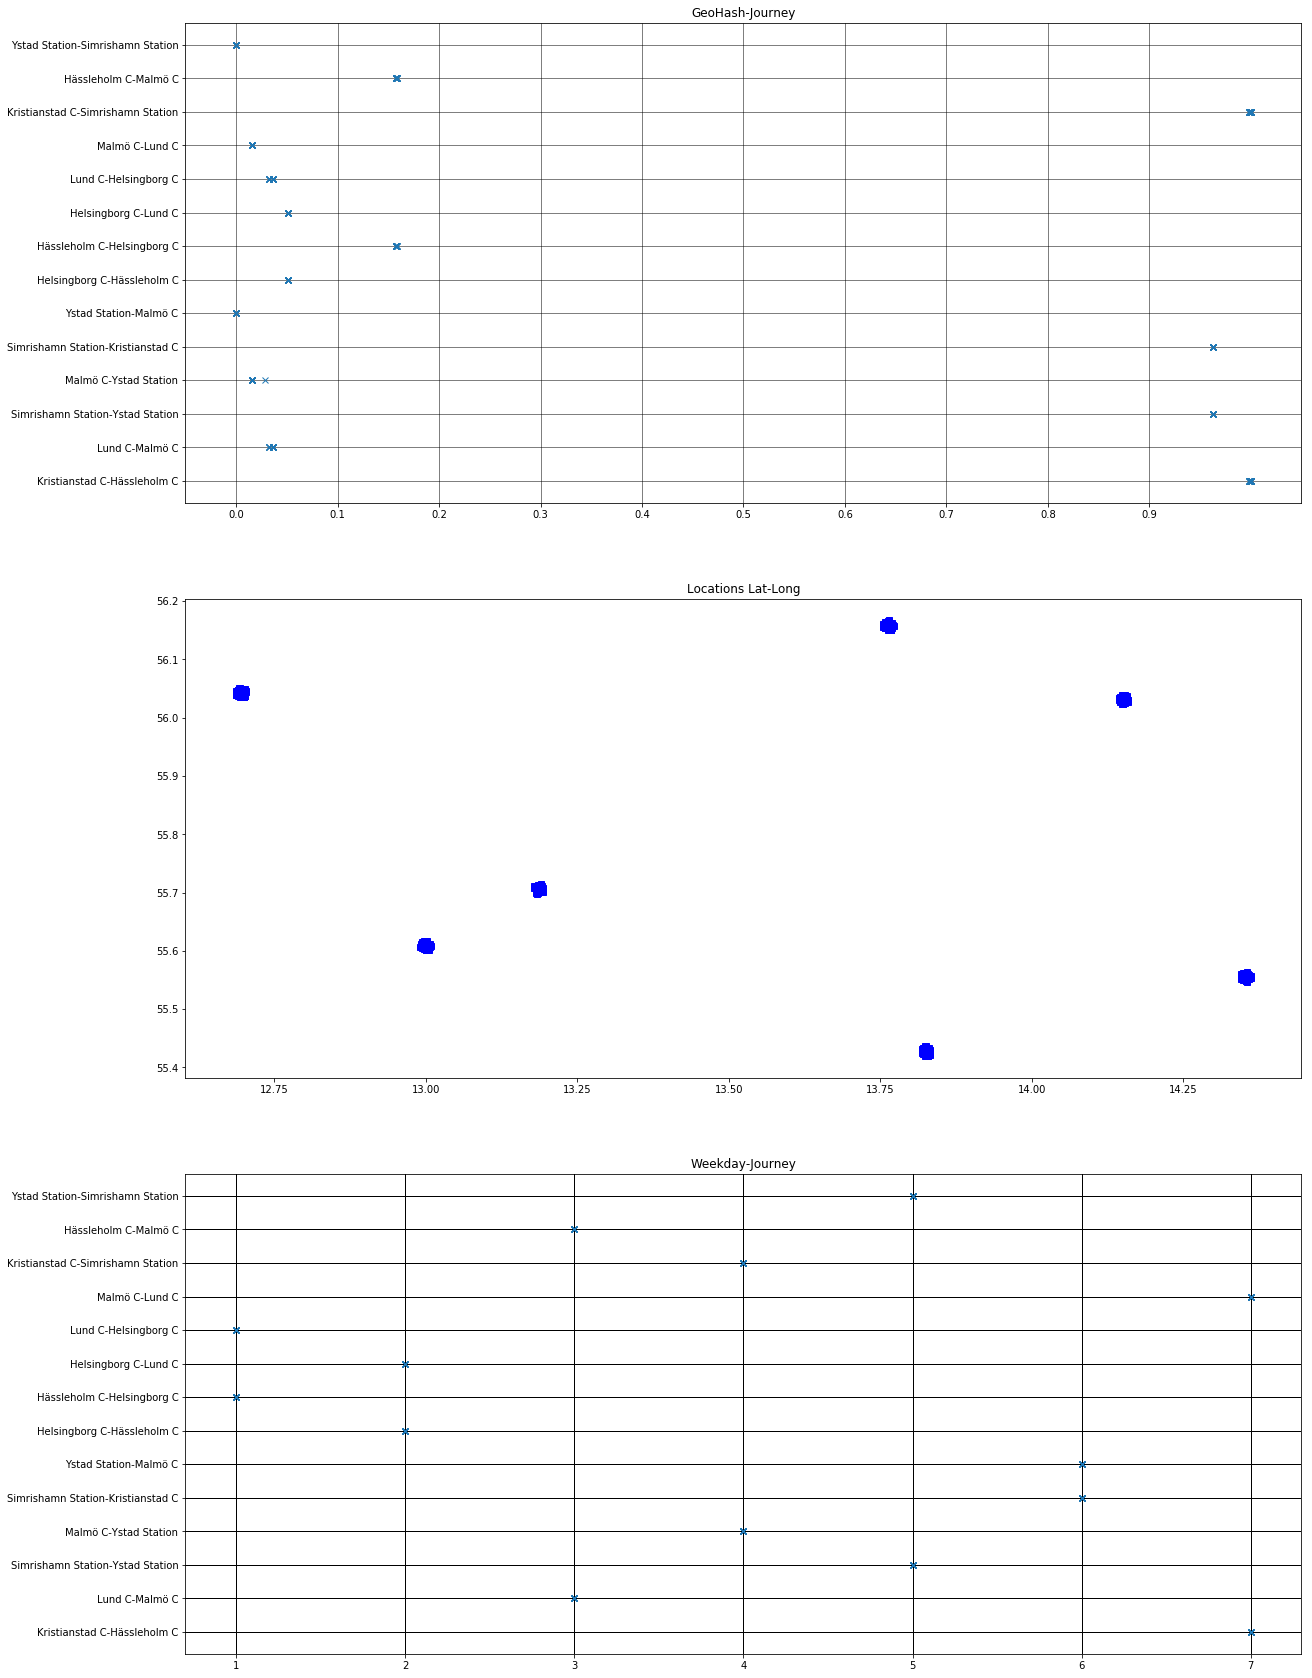

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.spatial.distance
dataSet = pd.read_csv("skane_around.csv")
journey = dataSet[['journey']]
dataSet = dataSet.sample(frac=1).reset_index(drop=True)
trainingData = np.array(dataSet)
plt.subplot(3, 1, 2)
plt.title("Locations Lat-Long")
plt.plot(trainingData[:,1],trainingData[:,2],'bs')
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(3, 1, 1)
geoHash = (trainingData[:,3] - trainingData[:,3].min())/ (trainingData[:,3].max()- trainingData[:,3].min()) ##Normalisering
plt.title("GeoHash-Journey")
journeys = dataSet['journey'].astype(str)
journeys = journeys.str.replace("9004291069","Kristianstad C-Simrishamn Station")
journeys = journeys.str.replace("9106990042","Simrishamn Station-Kristianstad C")
journeys = journeys.str.replace("9004293070","Kristianstad C-Hässleholm C")
journeys = journeys.str.replace("8324193070","Helsingborg C-Hässleholm C")
journeys = journeys.str.replace("9307083241","Hässleholm C-Helsingborg C")
journeys = journeys.str.replace("8623980000","Ystad Station-Malmö C")
journeys = journeys.str.replace("8000081216","Malmö C-Lund C")
journeys = journeys.str.replace("8121683241","Lund C-Helsingborg C")
journeys = journeys.str.replace("8623991069","Ystad Station-Simrishamn Station")
journeys = journeys.str.replace("9106986239","Simrishamn Station-Ystad Station")
journeys = journeys.str.replace("8324181216","Helsingborg C-Lund C") 
journeys = journeys.str.replace("8000086239","Malmö C-Ystad Station")
journeys = journeys.str.replace("8121680000","Lund C-Malmö C")
journeys = journeys.str.replace("9307090042","Hässleholm C-Malmö C")
plt.plot(geoHash,journeys,'x')
plt.xticks(np.arange(0, 1, step=0.1))
plt.rcParams["figure.figsize"] = (5,5)
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.subplot(3, 1, 3)
plt.title("Weekday-Journey")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.plot(trainingData[:,7].astype(np.int64),journeys,'x')
plt.show()
